In [8]:
import os
os.chdir("/Users/liutianlin/Desktop/Academics/MINDS/neuromorphic")

import numpy as np
from matplotlib import pyplot as plt
import h5py

from dynapseReservoir.networks.dynapseParameters import dynapseStructure
from dynapseReservoir.networks.reservoirsParameters import generalNetP, r64_1_1_P
from dynapseReservoir.networks.outputParameters import generalOutP
import DYNAPSETools.dynapseOutDecoder as DOD

import matplotlib.pyplot as plot

plt.close("all")


folderName = "/Users/liutianlin/Desktop/Academics/MINDS/neuromorphic/caer/myoutputs/thesis_output_aedat/"

 

In [9]:

# ====================== Define Filter events Core 0
filterCore0 = []
size = generalNetP["sizeTargetEncoding"] 
U0, C0, N = generalNetP["targetEncodingPos"]
targetNeurons = [x for x in range(N, size + N)]
filterCore0 += targetNeurons

# Filter events taking only events that are important for elaboration
U0, C0, N1 = generalNetP["startTriggerPos"]
U0, C0, N2 = generalNetP["stopTriggerPos"]
U0, C0, N3 = generalNetP["endStimulusPos"]
filterCore0 += [N1, N2, N3]

# ====================== Define Filter events Core 1
#%%
size = r64_1_1_P["N_Res"]
U0, C1, N = generalNetP["reservoirStartPos"]
filterCore1 = [x for x in range(N, size + N)]
#%%

# ====================== Apply filter
neuron_id_filter = [filterCore0, filterCore1]


totNeurons = dynapseStructure["nNeuronsPerChip"]
alpha = 0.01 # smoothing parameter

U, C, N = generalNetP["reservoirStartPos"]
startNeuronRes = dynapseStructure["nNeuronsPerCore"] * C + N
stopNeuronRes = startNeuronRes + r64_1_1_P["N_Res"]

    
    

In [10]:
inputRecording1 = 'baselineBias_classificationRes_shortPulse.aedat'
inputRecording2 = 'classificationBias_slowClassificationRes_shortPulse.aedat'

inputRecordingList = [inputRecording1, inputRecording2]


sicMat_dict = {}
for fileName in inputRecordingList:
    
    fileAddress = os.path.join(folderName, fileName)
     
    decEvents = DOD.import_events(fileAddress)

    decEvents = decEvents.normalize()

    decFilteredEvents = decEvents.filter_events(chip_id = U0, core_id = [C0, C1], neuron_id = neuron_id_filter) # Take only events i need

    # ====================== Extract experiments
    experiment = decFilteredEvents.isolate_events_sets(startTriggerNeuron = generalNetP["startTriggerPos"],
                                                            stopTriggerNeuron = generalNetP["stopTriggerPos"],
                                                            maxNumber = None)[0]

    spikeInducedCurrent_allNeurons = experiment.calculate_sic_matrix(totNeurons, alpha, timeBin = generalOutP["timeBin"]*0.1)
    sicMat =  np.array(spikeInducedCurrent_allNeurons[startNeuronRes:stopNeuronRes])
    
    sicMat_dict[fileName] = sicMat
    
    

Read all data

Extracted 1 experiments
Read all data

Extracted 1 experiments


# Visualization

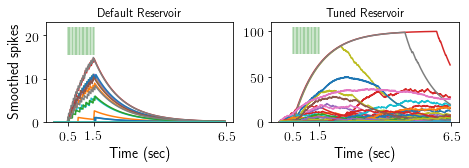

In [14]:
import random
random.seed(1)


plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

width = 6.37
# height = width / 1.618 /2
height = width / 1.5 /2


fig = plt.figure()
fig.subplots_adjust(left=.06, bottom=.16, right=.99, top=.97)


ax1 = fig.add_subplot(121)

ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Smoothed spikes')
ax1.set_ylim([0, 23])
ax1.set_xticks([0.5, 1.5, 6.5])
# ax1.axvline(x=0.5, color = 'k', linestyle = ':', linewidth = 5)
# ax1.axvline(x=1.5, color = 'k', linestyle = ':', linewidth = 5)
ax1.eventplot(np.linspace(0.5, 1.5, 20), lineoffsets = 18.7, linelengths = 6.27, linewidths = 0.4, color = 'g')     
ax1.set_title('Default Reservoir')

ax2 = fig.add_subplot(122)
ax2.set_ylim([0, 110])

ax2.set_xlabel('Time (sec)')
ax2.set_xticks([0.5, 1.5, 6.5])
ax2.eventplot(np.linspace(0.5, 1.5, 20), lineoffsets = 90, linelengths = 30, linewidths = 0.4, color = 'g')     
ax2.set_title('Tuned Reservoir')

# ax2.axvline(x=0.5, color = 'k', linestyle = ':', linewidth = 5)
# ax2.axvline(x=1.5, color = 'k', linestyle = ':', linewidth = 5)


thisSicMat = sicMat_dict[inputRecording1]
bins = np.arange(thisSicMat.shape[1])

randNeuronIndices = random.sample(range(0, 255), 50)

for i in randNeuronIndices:
    ax1.plot(bins * 0.01, sicMat_dict[inputRecording1][i,:])
    ax2.plot(bins * 0.01, sicMat_dict[inputRecording2][i,:])

# plt.subplots_adjust(wspace=0.2)
fig.subplots_adjust(left=.09, bottom=.25, right=.99, top= 0.90)
fig.set_size_inches(width, height)



plt.gcf().savefig('/Users/liutianlin/Desktop/Academics/MSc_thesis/my_msc_thesis/figs/thesis_pulse.pdf', dpi=1200)



In [10]:
bins * 0.01


array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [21]:
np.ones([1, 50])

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]])